<a href="https://colab.research.google.com/github/navaneet-03/FA_Project/blob/main/FA_pomegranate_fruits1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pomegranate project**
Using fruits

First we're importing all the utilities and functions to work with the dataset


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import cv2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Now we'll import the tensforflow utilities to build our cnn architecture

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

Now we shall import the dataset stored on google drive

In [ ]:
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
classes_map={'Bacterial' : 1, 'Fungal' : 2, 'Healthy' : 0}

In [ ]:
dir = "Pomegranate/Fruits/"


In [ ]:
tl = os.listdir(dir)
tl

['Bacterial', 'Healthy', 'Fungal']

In [ ]:
from google.colab.patches import cv2_imshow

Now, we shall work with the dataset and perform some image processing

In [ ]:
def get_data():
  images = []
  labels = []
  train_list = os.listdir(dir)
  print(train_list)
  for i in train_list:
    flag = 1
    for image in os.listdir(dir+ "/" + i):
      img=cv2.imread(dir + i + '/' + image)
      img=cv2.resize(img, (256,256))
      # img=cv2.resize(img, (224,224))
      if flag:
        print()
        print(i)
        cv2_imshow(img)
        flag = 0
      images.append(img)
      labels.append(classes_map[i])

  return images, labels

['Bacterial', 'Healthy', 'Fungal']

Bacterial


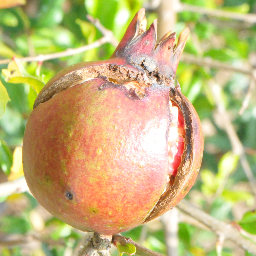


Healthy


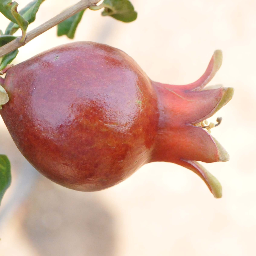


Fungal


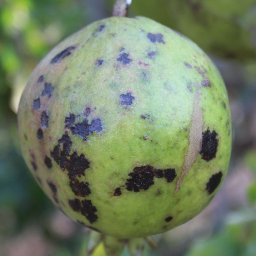

In [ ]:
X, Y = get_data()


In [ ]:
np_x=np.array(X)
label_encoded_y=to_categorical(Y)
# label_encoded_y

In [ ]:
len(X)

419

splitting the dataset to train validation and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_x, label_encoded_y, test_size = 0.2, random_state=1)

classes=3
batch=32
epochs=40
learning_rate=0.001

## Building the CNN model

In [ ]:
# model = Sequential()
# model.add(Conv2D(filters=10 , kernel_size = (5,5), kernel_regularizer=l2(0.1),activation= 'relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPool2D())
# model.add(Dropout(0.5))

# model.add(Conv2D(filters=20, kernel_size = (3,3), kernel_regularizer=l2(0.1),activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides = (2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters=30 , kernel_size = (3,3), kernel_regularizer=l2(0.1),activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D( strides = (2,2)))
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(128, kernel_regularizer=l2(0.1),activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(64, kernel_regularizer=l2(0.1),activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(Dense(3,activation = 'softmax'))

# model.summary()


In [ ]:
# model = Sequential()
# model.add(Conv2D(filters=10 , kernel_size = (7,7), activation= 'relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(filters=30, kernel_size = (5,5), activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(filters=40 , kernel_size = (3,3), activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D( strides = (2,2)))

# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.4))

# model.add(Dense(256,activation = 'relu'))
# model.add(Dropout(0.4))
# model.add(Dense(3,activation = 'softmax'))


In [ ]:
# model.summary()

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 246016)            0         
                                                                 
 dense_42 (Dense)            (None, 64)              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.3, shuffle = True, verbose=1)

Epoch 1/40
8/8 [==============================] - 3s 85ms/step - loss: 2306.2158 - accuracy: 0.4145 - val_loss: 71.8686 - val_accuracy: 0.4653
Epoch 2/40
8/8 [==============================] - 0s 52ms/step - loss: 36.0332 - accuracy: 0.5427 - val_loss: 10.7295 - val_accuracy: 0.7426
Epoch 3/40
8/8 [==============================] - 0s 52ms/step - loss: 4.0755 - accuracy: 0.8248 - val_loss: 8.7509 - val_accuracy: 0.7129
Epoch 4/40
8/8 [==============================] - 0s 52ms/step - loss: 2.3469 - accuracy: 0.8718 - val_loss: 10.4405 - val_accuracy: 0.6337
Epoch 5/40
8/8 [==============================] - 0s 52ms/step - loss: 0.9780 - accuracy: 0.9017 - val_loss: 7.6586 - val_accuracy: 0.7426
Epoch 6/40
8/8 [==============================] - 0s 49ms/step - loss: 0.5376 - accuracy: 0.9444 - val_loss: 8.4046 - val_accuracy: 0.6634
Epoch 7/40
8/8 [==============================] - 0s 49ms/step - loss: 0.2230 - accuracy: 0.9658 - val_loss: 7.6531 - val_accuracy: 0.7426
Epoch 8/40
8/8 [====

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

3/3 [==============================] - 0s 12ms/step - loss: 2.8008 - accuracy: 0.8095
Test accuracy: 0.8095238208770752
Test loss: 2.8007850646972656


In [ ]:
y_pred_ = model.predict(x_test)
y_pred = []
#print(y_pred_)
for i in y_pred_:
  m = 0
  for x in range(len(i)):
    temp = [0,0,0]
    if i[x] > i[m]:
      m = x
    temp[m] = 1
  y_pred.append(temp)
# y_test

3/3 [==============================] - 0s 12ms/step


In [ ]:
from sklearn.metrics import classification_report
print("Test Data\n", classification_report(y_test, y_pred, target_names = ['Healthy', 'Bacterial', 'Fungal']))

Test Data
               precision    recall  f1-score   support

     Healthy       0.86      0.63      0.73        19
   Bacterial       0.68      0.92      0.78        25
      Fungal       0.92      0.82      0.87        40

   micro avg       0.81      0.81      0.81        84
   macro avg       0.82      0.79      0.79        84
weighted avg       0.83      0.81      0.81        84
 samples avg       0.81      0.81      0.81        84



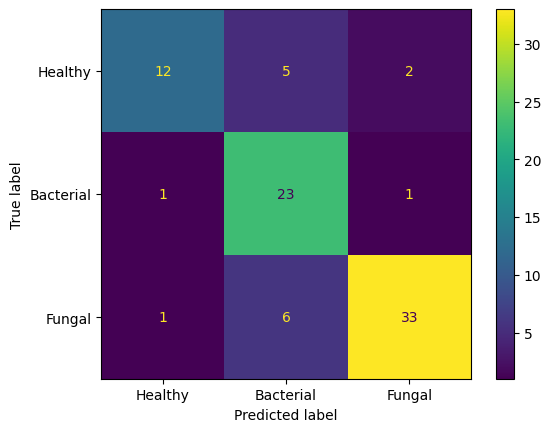

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_t = [np.argmax(i) for i in y_test]
y_p = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_t, y_p)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy', 'Bacterial', 'Fungal'])
cm_display.plot()
plt.show()

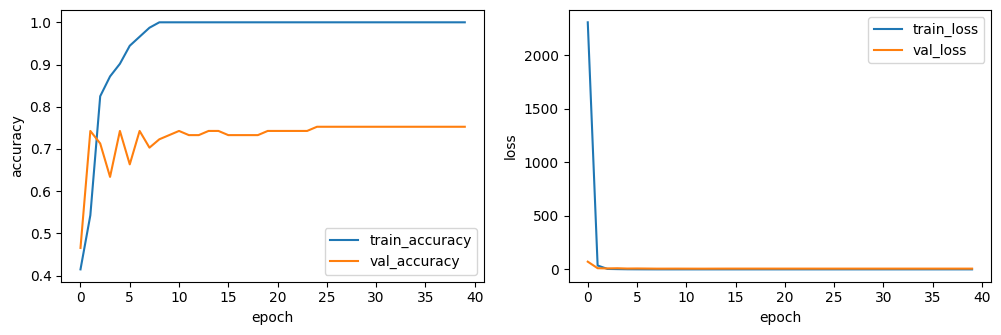

In [ ]:
def plot_results(model):

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()



plot_results(model)